# Classification Prediction Model: Client Term Bank Deposit

By: Katrina James, Christian Urday, Justin Kerry

## Introductory Statement

Banks offer a wide variety of financial services to the population and have long found themselves as a critical element in the foundation of our civilization. As a society, we rely on banks as a major pillar for the overall national economic health and stability. As individuals, we rely on banks as institutions that allow us to hold, borrow, and deposit money in a highly organized and archived manner. Due to this, banking is widely considered a service and an ally for many people. Although that is true, banking should also be considered a business. And like any other type of business, there are limitations and restrictions held in place to protect and safeguard the business. Some of these limitations and restrictions can include charging clients a penalty for early withdrawals and maintaining interest rates against rising inflation. What we are studying here is called a term deposit.

## Background

A term deposit is a fixed term investment made by a client when they deposit money into an account. This investment is then taken by the bank and loaned to other clients or invested in other finacial products with a higher rate of return. Since banks can be considered businesses, they ideally want to pay back to the investor the lowest possible rate of interest for the term deposit and generate the highest possible rate of interest through the loan or product of investment. Ultimately term deposits can be attractive for low risk investors since they are risk free however certain restrictions can lead to clients opting out of a term deposit. A term deposit that is made must be held by the bank for a specified time period and not withdrawn earlier or there will be a penalty charged. Interest rates paid to investors do not keep up with the rising level of inflation over time. Many other fixed-rate investments pay higher interest rates than term deposits. So even though term deposits can be attractive to investors because they are a low risk investment, these restrictions can lead to clients choosing not to invest in term deposits.

## Objective

We will be using a machine learning model to predict whether or not a bank client will choose to invest in the low risk yet limited investment known as a term deposit. This can be achieved by utilizing some dependent variables that have a great deal of predictive power while at the same time avoiding multi-collinearity that will hinder the coefficients of our independent variables creating bias in our models.

## Analysis

For our research, we will use a dataset that we sourced from Kaggle called Bank Marketing (Binary Classification). 

This dataset was created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012.
It was fully described and analysed in S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology.

For the purposes of the assignment we have extracted the full-dataset which includes over 40,000 records. The number of attributes that this dataset contains is 16 outputs.

The following code will generate the dataset as a viewable table. This will allow us to view all variables including the 'deposit' column which as mentioned previously is our target variable:

In [3]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, auc, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
import statsmodels.api as sm

pd.set_option('display.max_columns', None)

bank_df = pd.read_csv(os.path.join('data', 'Bank.csv'), index_col=0)
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,deposit
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,yes
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,yes


## Purpose

The dataset was collected with the intention of predicting whether or not the client of a bank will subscribe to a term deposit. We decided on this dataset because we found that it was clear and concise. It also has sufficient records of data as well as sufficient independent variables that can be considered relatable to our target variable.

## Representation

For the purposes of our classification prediction models, we can define and measure the outcomes from the dataset using just a couple of different categorical values. These values include people who did subscribe for term deposit encoded as '1' and people who did not subscribe for the deposit encoded as '0'. We will encode these target variables as binary values to the dataset using the .map function in python.

In [4]:
bank_df['deposit'] = bank_df['deposit'].map({'yes': 1, 'no': 0})
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,deposit
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


We had to represent 'was not previously contacted' (pdays = 999) as a boolean value which is now shown in the following table under 'client_was_contacted' (0 for no and 1 for yes). This feature engineering is important since it allows our models to recognize whether the client was contacted or not by the bank.

In [5]:
bank_df['client_was_contacted'] = np.where(bank_df['pdays'] == 999, 0, 1)
bank_df['pdays'] = np.where(bank_df['pdays'] == 999, 0, bank_df['pdays'])
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,deposit,client_was_contacted
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1,1



We will also measure the effectiveness of our algorithms using a Test Confusion Matrix which will show us a test accuracy score likely displayed as a decimal number to provide us with a percentage. Confusion Matrix for both models will be displayed later in this report at appropriate times.

## Constructing a Final Dataset and Building our Logistic Regression Model

In order for our classification prediction models to be more accurate, we had to modify some variables in our dataset. First we had to use the info_value_calc function with an if statement in python to model text data as categorical and numerical data as continous. Continuous data has been binned into decimals for normalization:

In [6]:
def info_value_calc(df, column, is_categorical):
    if is_categorical:
        info_val_df = df.groupby([column])['deposit'].agg(['count', 'sum'])
    else:
        df['variable_bin'] = pd.qcut(df[column].rank(method='first'), 10)
        info_val_df = df.groupby(['variable_bin'])['deposit'].agg(['count', 'sum'])
    
    info_val_df = info_val_df.rename(columns={'sum': 'bad'})
    info_val_df["good"] = info_val_df["count"] - info_val_df["bad"]
    info_val_df["bad_percentage"] = info_val_df["bad"] / info_val_df["bad"].sum()
    info_val_df["good_percentage"] = info_val_df["good"] / info_val_df["good"].sum()
    info_val_df["information_value"] = info_val_df.apply(lambda row: (row['good_percentage'] - row['bad_percentage']) * (np.log(row["good_percentage"] / row["bad_percentage"]) if row["bad_percentage"] != 0.0 else 1.0), axis=1)
    return info_val_df

In [7]:
print(info_value_calc(bank_df, 'education', True))
print('Total information value: ' + str(info_value_calc(bank_df, 'education', True)['information_value'].sum()))

                     count   bad   good  bad_percentage  good_percentage  \
education                                                                  
basic.4y              4176   428   3748        0.092241         0.102550   
basic.6y              2292   188   2104        0.040517         0.057568   
basic.9y              6045   473   5572        0.101940         0.152457   
high.school           9515  1031   8484        0.222198         0.232133   
illiterate              18     4     14        0.000862         0.000383   
professional.course   5243   595   4648        0.128233         0.127175   
university.degree    12168  1670  10498        0.359914         0.287239   
unknown               1731   251   1480        0.054095         0.040495   

                     information_value  
education                               
basic.4y                      0.001092  
basic.6y                      0.005989  
basic.9y                      0.020333  
high.school                   0.00

### Predictive Power

Another process we had to consider was removing unnecessary variables that didn't have any predictive power for our models. Before we could do that however we had to address other considerations prior. We first performed an information value calculation to determine predictive power. When we printed out the information value we ended up with the following results:

Now that we have an idea of predictive power, we have a better understanding on which variables can be removed. However before we start removing them, we should manipulate the data further to achieve more specific information regarding our data.

### Dummy Variables

In order for our models to handle categorical data types, we will need to transpose them into dummy variables:

In [8]:
client_contacted_dummies = pd.get_dummies(bank_df['client_was_contacted'], prefix='client_was_contacted')
poutcome_dummies = pd.get_dummies(bank_df['poutcome'], prefix='poutcome')
month_dummies = pd.get_dummies(bank_df['month'], prefix='month')
contact_dummies = pd.get_dummies(bank_df['contact'], prefix='contact')
job_dummies = pd.get_dummies(bank_df['job'], prefix='job')
default_dummies = pd.get_dummies(bank_df['default'], prefix='default')

bank_model_df = pd.concat([bank_df[['duration', 'nr_employed', 'euribor3m', 'emp_var_rate', 'cons_conf_idx', 'cons_price_idx', 'deposit', 
                                   'pdays', 'age', 'previous']],
                          client_contacted_dummies, poutcome_dummies, month_dummies, 
                          contact_dummies, job_dummies, default_dummies], axis=1)
bank_model_df.head()

,duration,nr_employed,euribor3m,emp_var_rate,cons_conf_idx,cons_price_idx,deposit,pdays,age,previous,client_was_contacted_0,client_was_contacted_1,poutcome_failure,poutcome_nonexistent,poutcome_success,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,contact_cellular,contact_telephone,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,default_no,default_unknown,default_yes
0,210,5228.1,4.963,1.4,-36.1,93.444,0,0,44,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,138,5195.8,4.021,-0.1,-42.0,93.200,0,0,53,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,339,4991.6,0.729,-1.7,-39.8,94.055,1,6,28,2,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,185,5099.1,1.405,-1.8,-47.1,93.075,0,0,39,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,137,5076.2,0.869,-2.9,-31.4,92.201,1,3,55,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


### Removing Variables

As previously mentioned, we had to get rid of certain variables that didn't have any predictive power for our machine learning models. We can start by removing excess dummy variables created by pandas when we initially called for them.

Let's split our data into test set and train set and remove the excess dummy variables from the train set. That way they won't be used during testing.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(bank_model_df.drop(['deposit'] ,axis=1), 
                                                    bank_model_df['deposit'],
                                                    train_size=0.7, # 70-30 split
                                                    random_state=42) # constant seed allows for reproducability
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [10]:
columns_to_drop = ['client_was_contacted_1', 'poutcome_nonexistent', 'month_apr', 'contact_cellular', 'job_self-employed', 'default_unknown']
logistic_model = sm.Logit(y_train, sm.add_constant(x_train.drop(columns_to_drop, axis=1))).fit(maxiter=1000)
print(logistic_model.summary())

         Current function value: 0.202419
         Iterations: 1000


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:                deposit   No. Observations:                28831
Model:                          Logit   Df Residuals:                    28795
Method:                           MLE   Df Model:                           35
Date:                Thu, 11 Feb 2021   Pseudo R-squ.:                  0.4210
Time:                        20:48:21   Log-Likelihood:                -5836.0
converged:                      False   LL-Null:                       -10079.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -288.6847     46.823     -6.165      0.000    -380.455    -196.914
duration                   0.0049   9.21e-05     53.610      0.000       0.005       0.005
nr_e

--

The excess dummy variables have now been removed from the dataset and we can really begin to narrow down which variables are unneccesary or detrimental to our predictive power.

As we eliminate these undesirable variables, we can also simultaneously build our Logistic Regression model.

First let's check for variables that hinder our independent coefficients through multi-collinearity. We can achieve this through the use of the variance inflation factor:

In [11]:
variance_inflation_list = []
variables = pd.Series(x_train.drop(columns_to_drop, axis=1).columns)
completed_cols = []
variance_inflation_factors = []

for variable in variables:
    completed_cols.append(variable)
    dependent_variable = variable
    independent_variables = variables[~variables.isin(completed_cols)]
    mod = sm.OLS(x_train.drop(columns_to_drop, axis=1)[dependent_variable], sm.add_constant(x_train.drop(columns_to_drop, axis=1)[independent_variables.to_list()]))
    residuals = mod.fit()
    variance_inflation_factor = 1 / (1 - residuals.rsquared)
    variance_inflation_factors.append({'dependent_variable': dependent_variable, 'variance_inflation_factor': variance_inflation_factor})
    
print(pd.DataFrame(variance_inflation_factors))

        dependent_variable  variance_inflation_factor
0                 duration                   1.011601
1              nr_employed                 199.199988
2                euribor3m                 104.090973
3             emp_var_rate                   7.440831
4            cons_conf_idx                   2.220549
5           cons_price_idx                   2.621768
6                    pdays                   3.963402
7                      age                   1.405326
8                 previous                   5.568172
9   client_was_contacted_0                  11.033087
10        poutcome_failure                   1.157539
11        poutcome_success                   1.073545
12               month_aug                   2.925225
13               month_dec                   1.024404
14               month_jul                   1.522485
15               month_jun                   1.601930
16               month_mar                   1.021689
17               month_may  

--

Now that we have access to the variance inflation factors for each variable, we should determine the C-Statistic (AUC) which will tell us how accurate the classifier is at predicting the target variable.

--

In [12]:
def df_crossjoin(df1, df2, **kwargs):
    df1['temp_key'] = 1
    df2['temp_key'] = 1
    return_df = pd.merge(df1, df2, on='temp_key', **kwargs).drop('temp_key', axis=1)
    return_df.index = pd.MultiIndex.from_product((df1.index, df2.index))
    return return_df

y_prediction = pd.DataFrame(logistic_model.predict(sm.add_constant(x_train.drop(columns_to_drop, axis=1))))
y_prediction.columns = ["probabilities"]
both_df = pd.concat([y_train, y_prediction], axis=1)
zeros_df = both_df[['deposit', 'probabilities']][both_df['deposit'] == 0]
ones_df = both_df[['deposit', 'probabilities']][both_df['deposit'] == 1]
joined_df = df_crossjoin(ones_df, zeros_df)
joined_df['concordant_pair'] = 0
joined_df.loc[joined_df['probabilities_x'] > joined_df['probabilities_y'], 'concordant_pair'] = 1
joined_df['discordant_pair'] = 0
joined_df.loc[joined_df['probabilities_x'] < joined_df['probabilities_y'], 'discordant_pair'] = 1
joined_df['tied_pair'] = 0
joined_df.loc[joined_df['probabilities_x'] == joined_df['probabilities_y'], 'tied_pair'] = 1
p_concordant = (sum(joined_df['concordant_pair']) * 1.0 ) / (joined_df.shape[0])
p_discordant = (sum(joined_df['discordant_pair']) * 1.0 ) / (joined_df.shape[0])
c_statistic = 0.5 + (p_concordant - p_discordant) / 2.0
print("C-statistic: " + str(c_statistic))

C-statistic: 0.9385172268269756


--

Our C-statistic is 0.9 and since that statistic is >0.7 our Logistic Regression model can be considered very strong at predicting the target variable. This is great news and now we can begin the process of removing the unneccessary variables that are multi-colinear. We can determine which variables can be removed by analysing the data to see which variables have a high p-value and a high variance inflation factor.

The following code contains the columns that we have already dropped when we removed the excess dummy variables. Only now we will include the column 'default_yes' which will be the first variable dropped due to multi-collinearity.

--

In [13]:
columns_to_drop = ['client_was_contacted_1', 'poutcome_nonexistent', 'month_apr', 'contact_cellular', 'job_self-employed', 'default_unknown', 'default_yes']
logistic_model = sm.Logit(y_train, sm.add_constant(x_train.drop(columns_to_drop, axis=1))).fit(maxiter=1000)
print(logistic_model.summary())

Optimization terminated successfully.
         Current function value: 0.202420
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                deposit   No. Observations:                28831
Model:                          Logit   Df Residuals:                    28796
Method:                           MLE   Df Model:                           34
Date:                Thu, 11 Feb 2021   Pseudo R-squ.:                  0.4210
Time:                        20:52:38   Log-Likelihood:                -5836.0
converged:                       True   LL-Null:                       -10079.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -288.6970     46.823     -6.166      0.000    -380.468    -

--

Now instead of showing the code for each elimination, we will simply show the Logit Regression Results table to demonstrate how the statistics for each attribute will change each time an attribute is eliminated.

--

'job_unemployed' was removed.

'job_services' was removed.

'previous' was removed.

'pdays' was removed.

'job_entrepreneur' was removed.

'job_housemaid' was removed.

'job_unknown' was removed.

'month_oct' was removed.

'age' was removed.

'month_dec' was removed.

'month_jul' was removed.

'job_blue-collar' was removed

'nr_employed' was dropped.

'euribor3m' was dropped.

'client_was_contacted_0' was dropped.

'month_sep' was dropped.

'emp_var_rate' was dropped.

--

As shown above, this process was used to drop several more unneccesary variables until all variables had a p-value < 0.05 and all variance inflation factors were < 5 with an overall C-Statistic greater than 0.7 as originally desired.

These unneccesary variables included:
- job_unemployed
- job_services
- previous
- pdays
- job_entrepreneur
- job_housemaid
- job_unknown
- month_oct
- age
- month_dec
- month_jul
- job_blue_collar

Some explanitory variables were also removed due to multi-collinearity:
- nr-employed
- euribor3m
- client_was_contacted_0
- month_sep
- emp_var_rate

--

Now let's take a look at the final dataset that we will use for our Logistic Regression model.

--

In [14]:
columns_to_drop = ['client_was_contacted_1', 'poutcome_nonexistent', 'month_apr', 'contact_cellular', 'job_self-employed', 'default_unknown', 'default_yes', 'job_unemployed', 'job_services', 'previous', 'pdays', 'job_entrepreneur', 'job_housemaid', 'job_unknown', 'month_oct', 'age', 'month_dec', 'month_jul', 'job_blue-collar', 'nr_employed', 'euribor3m', 'client_was_contacted_0', 'month_sep', 'emp_var_rate']
logistic_model = sm.Logit(y_train, sm.add_constant(x_train.drop(columns_to_drop, axis=1))).fit(maxiter=1000)
print(logistic_model.summary())

Optimization terminated successfully.
         Current function value: 0.226093
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                deposit   No. Observations:                28831
Model:                          Logit   Df Residuals:                    28813
Method:                           MLE   Df Model:                           17
Date:                Thu, 11 Feb 2021   Pseudo R-squ.:                  0.3533
Time:                        20:52:50   Log-Likelihood:                -6518.5
converged:                       True   LL-Null:                       -10079.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                56.8294      4.565     12.449      0.000      47.882      65.777
duration

--

As mentioned, the above table shows us all of our remaining variables in our final dataset that will be used to predict whether or not a bank client will subscribe to a term deposit.

Before we build our first model using Logistic Regression, we should check the Variance Inflation Factors once more to ensure that they are all still < 5 after dropping the unnecessary columns.

--

In [15]:
variance_inflation_list = []
variables = pd.Series(x_train.drop(columns_to_drop, axis=1).columns)
completed_cols = []
variance_inflation_factors = []

for variable in variables:
    completed_cols.append(variable)
    dependent_variable = variable
    independent_variables = variables[~variables.isin(completed_cols)]
    mod = sm.OLS(x_train.drop(columns_to_drop, axis=1)[dependent_variable], sm.add_constant(x_train.drop(columns_to_drop, axis=1)[independent_variables.to_list()]))
    residuals = mod.fit()
    variance_inflation_factor = 1 / (1 - residuals.rsquared)
    variance_inflation_factors.append({'dependent_variable': dependent_variable, 'variance_inflation_factor': variance_inflation_factor})
    
print(pd.DataFrame(variance_inflation_factors))

   dependent_variable  variance_inflation_factor
0            duration                   1.008880
1       cons_conf_idx                   1.744903
2      cons_price_idx                   2.088726
3    poutcome_failure                   1.110921
4    poutcome_success                   1.032184
5           month_aug                   1.360583
6           month_jun                   1.571653
7           month_mar                   1.018829
8           month_may                   1.190489
9           month_nov                   1.047445
10  contact_telephone                   1.029174
11         job_admin.                   1.201458
12     job_management                   1.025359
13        job_retired                   1.009973
14        job_student                   1.005703
15     job_technician                   1.004838
16         default_no                   1.000000


--

As we can see, all of the remaining variables in our final datset still have variance inflation factors that are valued at less than 5.

Now that we have the final dataset, let's take a more in depth look at our data and break it down further before model construction.

--

## Evaluation of Data

Here is a description of the meaning and type of data for each attribute in our final dataset:

- duration: time elapsed for last client contact in seconds (numeric).
- cons_conf_idx: monthly indicator for consumer confidence index (numeric).
- cons_price_idx: monthly indicator for consumer confidence index (numeric).
- poutcome_failure: Previous marketing campaign was unsuccessful based on campaign results as defined by objective (categorical).
- poutcome_success: Previous marketing campaign was successful based on campaign results as defined by objective (categorical).
- month_aug: Last contact for client was during the month of August during specified year (categorical).
- month_jun: Last contact for client was during the month of June during specified year (categorical).
- month_mar: Last contact for client was during the month of March during specified year (categorical).
- month_may: Last contact for client was during the month of May during specified year (categorical).
- month_nov: Last contact for client was during the month of November during specified year (categorical).
- contact_telephone: Method of contacting specified client was by telephone (categorical).
- job_admin.: Client career position was administrative (categorical).
- job_management: Client career position was in management (categorical).
- job_retired: Client was retired during collection of data (catergorical).
- job_student: Client was a student during collection of data (categorical).
- job_technician: Client career position was as a technician (categorical).
- default_no: Client did not have any credit in default during collection of data (categorical).

--

Let us take the top five variables with the most predictive power in our final Logistic Regression dataset and visualize it using the pairplot function in the seaborn library. This will display all of our variables allowing us to cross-examine each of them and visualize any patterns potentially drawing some theories or conclusions.

In [36]:
print("Feature ranking:")
for feature in range(x_train.shape[1]):
    print ("Feature", logistic_model[feature], ",", column_names[indices[feature]], importances[indices[feature]])

Feature ranking:


TypeError: 'BinaryResultsWrapper' object is not subscriptable

<Figure size 1440x1440 with 0 Axes>

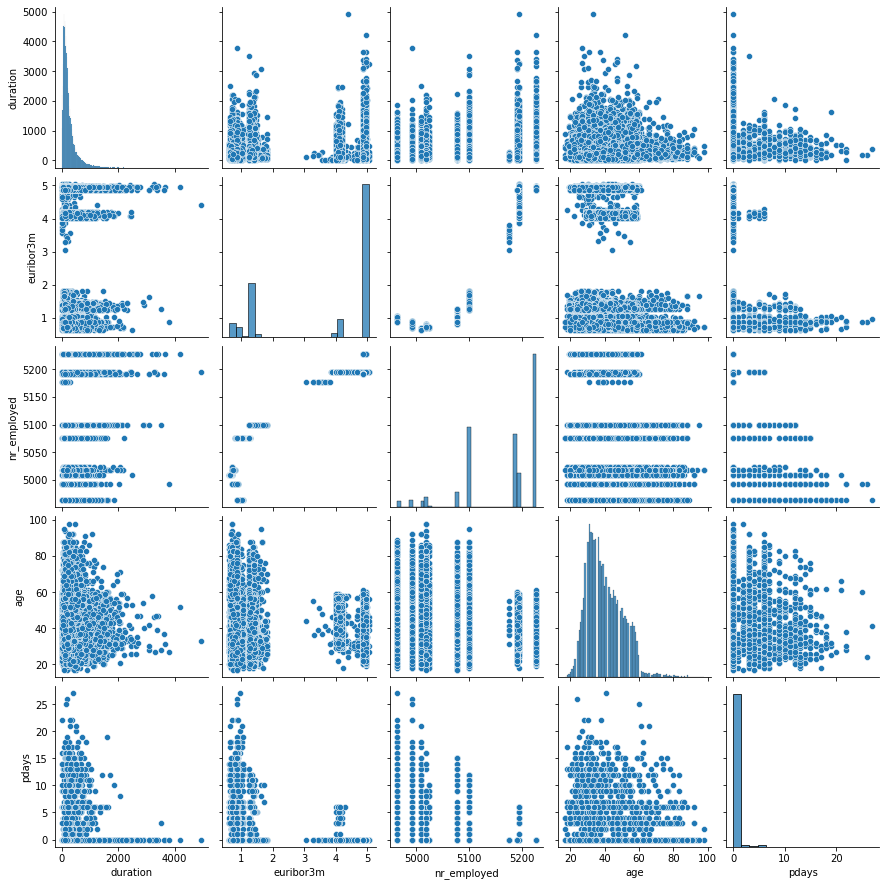

In [16]:
fig = plt.figure(figsize = (20,20))

sns.pairplot(bank_model_df[['duration','euribor3m','nr_employed','age','pdays']])

The following are some theoretical conclusions that can be drawn from our top five predictive attributes featured in the above pairplot:

### Data Verification

In order to effectively verify the quality of our data, we will need to examine the dataset for missing values, duplicates, and outliers. If any are found, we will need to come to a concensus on whether these attributes are errors or part of a quality dataset.

First let us check to see if there is any missing data in our dataset. We will use the original dataset from our bank_model_df dataframe.

In [38]:
bank_model_df.isnull()

,duration,nr_employed,euribor3m,emp_var_rate,cons_conf_idx,cons_price_idx,deposit,pdays,age,previous,client_was_contacted_0,client_was_contacted_1,poutcome_failure,poutcome_nonexistent,poutcome_success,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,contact_cellular,contact_telephone,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,default_no,default_unknown,default_yes
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
41184,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
41185,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
41186,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


--

The .isnull() function allows us to see if our dataset has any missing values. Since the boolean value False is returned for each column of each row, we can see that our dataset has no missing values.
The .get_dummies function generated some duplicate variables, however they have already been previously dropped when eliminating unnecessary variables.

Next let us create some boxplots in order to visualize any outliers in our dataset. We will run our target variable (deposit) against one of the top five attributes for each boxpot. This will give us sufficient outliers to look at and analyze.

--

<AxesSubplot:xlabel='deposit', ylabel='age'>

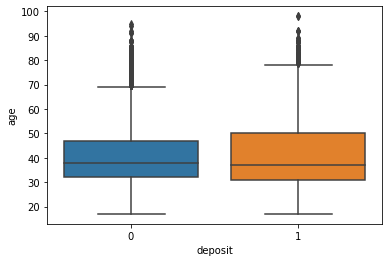

In [39]:
sns.boxplot(x = 'deposit', y = 'age', data = bank_model_df)

<AxesSubplot:xlabel='deposit', ylabel='duration'>

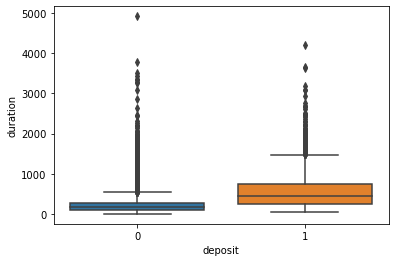

In [40]:
sns.boxplot(x = 'deposit', y = 'duration', data = bank_model_df)

We decided to run age against deposit when analysing our dataset for outliers since that is the attribute that will definitely have outliers.

<Figure size 1440x1440 with 0 Axes>

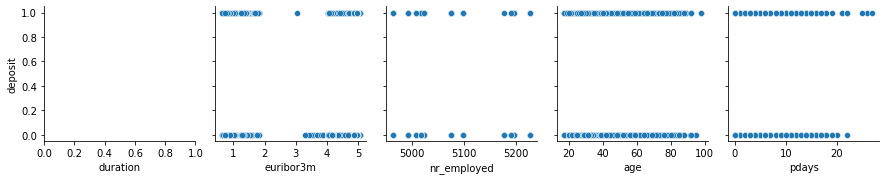

In [27]:
fig = plt.figure(figsize = (20,20))

sns.pairplot(data = bank_model_df, x_vars = ['duration','euribor3m','nr_employed','age','pdays'], y_vars = ['deposit'])

### Data Statistics

In order to define key statistics, we will need to use the .describe function.

In [19]:
bank_model_df.describe()

,duration,nr_employed,euribor3m,emp_var_rate,cons_conf_idx,cons_price_idx,deposit,pdays,age,previous,client_was_contacted_0,client_was_contacted_1,poutcome_failure,poutcome_nonexistent,poutcome_success,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,contact_cellular,contact_telephone,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,default_no,default_unknown,default_yes
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,258.285010,5167.035911,3.621291,0.081886,-40.502600,93.575664,0.112654,0.221229,40.02406,0.172963,0.963217,0.036783,0.103234,0.863431,0.033335,0.063902,0.149995,0.004419,0.174177,0.129115,0.013256,0.334296,0.099568,0.017432,0.013839,0.634748,0.365252,0.253035,0.224677,0.035350,0.025736,0.070992,0.041760,0.034500,0.096363,0.021244,0.163713,0.024619,0.008012,0.791201,0.208726,0.000073
std,259.279249,72.251528,1.734447,1.570960,4.628198,0.578840,0.316173,1.348874,10.42125,0.494901,0.188230,0.188230,0.304268,0.343396,0.179512,0.244581,0.357071,0.066328,0.379266,0.335332,0.114372,0.471750,0.299427,0.130877,0.116824,0.481507,0.481507,0.434756,0.417375,0.184665,0.158348,0.256814,0.200042,0.182513,0.295092,0.144199,0.370019,0.154962,0.089152,0.406455,0.406403,0.008534
min,0.000000,4963.600000,0.634000,-3.400000,-50.800000,92.201000,0.000000,0.000000,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,102.000000,5099.100000,1.344000,-1.800000,-42.700000,93.075000,0.000000,0.000000,32.00000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,180.000000,5191.000000,4.857000,1.100000,-41.800000,93.749000,0.000000,0.000000,38.00000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,319.000000,5228.100000,4.961000,1.400000,-36.400000,93.994000,0.000000,0.000000,47.00000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4918.000000,5228.100000,5.045000,1.400000,-26.900000,94.767000,1.000000,27.000000,98.00000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Immediately we can see that the longest call duration was 4918 seconds and the shortest was 0 seconds. This shows a strong correlation with our target variable since 0 second calls can be considered deposit = 0.

Another interesting statistic is that the mean of client's age is roughly 40 years old. This illustrates a stage for the common target variable.

Lastly, the standard deviation for client_was_contacted_0 (no) and client_was_contacted_1 (yes) is the exact same. That tells us that the average amount of variability of whether or not the client was contacted is the same. Each score lies the exact same distance from the mean. Since both of the standard deviation values are low (0.188230), that tells us that both values for whether or not the client was contacted are clustered around the mean.   

### Feature Selection

## Logistic Regression Model

To build our Logistic Regression model, the following code will be used to determine the probability of a client securing a term deposit using the y_prediction variable in python.

At the same time we will also print the C-Statistic as a string to show the predictive accuracy of this Logistic Regression model.

In [28]:
y_prediction = pd.DataFrame(logistic_model.predict(sm.add_constant(x_train.drop(columns_to_drop, axis=1))))
y_prediction.columns = ["probabilities"]
both_df = pd.concat([y_train, y_prediction], axis=1)
zeros_df = both_df[['deposit', 'probabilities']][both_df['deposit'] == 0]
ones_df = both_df[['deposit', 'probabilities']][both_df['deposit'] == 1]
joined_df = df_crossjoin(ones_df, zeros_df)
joined_df['concordant_pair'] = 0
joined_df.loc[joined_df['probabilities_x'] > joined_df['probabilities_y'], 'concordant_pair'] = 1
joined_df['discordant_pair'] = 0
joined_df.loc[joined_df['probabilities_x'] < joined_df['probabilities_y'], 'discordant_pair'] = 1
joined_df['tied_pair'] = 0
joined_df.loc[joined_df['probabilities_x'] == joined_df['probabilities_y'], 'tied_pair'] = 1
p_concordant = (sum(joined_df['concordant_pair']) * 1.0 ) / (joined_df.shape[0])
p_discordant = (sum(joined_df['discordant_pair']) * 1.0 ) / (joined_df.shape[0])
c_statistic = 0.5 + (p_concordant - p_discordant) / 2.0
print("C-statistic: " + str(c_statistic))

C-statistic: 0.9155895049081026


Now that the Linear Regression model has been built, we will plot out the ROC curve which will also include the Area Under Curve to provide us with an accuracy inside of a visual representation.

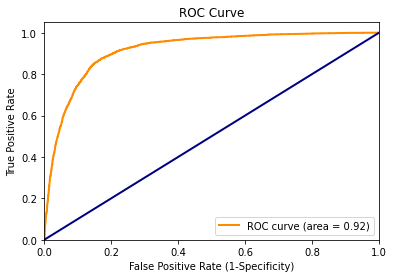

In [29]:
fpr, tpr, thresholds = metrics.roc_curve(both_df['deposit'], both_df['probabilities'], pos_label=1)
roc_auc = auc(fpr, tpr)

%matplotlib inline
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In order for us to optimize the classifier of our test set, we will need to determine the threshold cut-off point for the probability of our training set.

We can use the grid search to determine the threshold.

In [30]:
for i in list(np.arange(0, 1, 0.1)):
    both_df["y_predictor"] = 0
    both_df.loc[both_df["probabilities"] > i, 'y_predictor'] = 1
    print ("Threshold", round(i, 2), "Train Accuracy:", round(accuracy_score(both_df['deposit'], both_df['y_predictor']), 4))

Threshold 0.0 Train Accuracy: 0.1115
Threshold 0.1 Train Accuracy: 0.8393
Threshold 0.2 Train Accuracy: 0.894
Threshold 0.3 Train Accuracy: 0.9066
Threshold 0.4 Train Accuracy: 0.9096
Threshold 0.5 Train Accuracy: 0.9076
Threshold 0.6 Train Accuracy: 0.9057
Threshold 0.7 Train Accuracy: 0.9019
Threshold 0.8 Train Accuracy: 0.898
Threshold 0.9 Train Accuracy: 0.8949


--

Based on this data, we can see that the optimal threshold cut-off point can be found at 0.4 with an accuracy of 0.9096

Now we can set the threshold to 0.4 when classifying our data.

In order to visualize the test set accuracy of our Logistic Regression model, we can print a confusion matrix that will allow us to compare this model with our other model.

In [31]:
y_prediction_test_df = pd.DataFrame(logistic_model.predict(sm.add_constant(x_test.drop(columns_to_drop, axis=1))))
y_prediction_test_df.columns = ["probabilities"]
both_test_df = pd.concat([y_test, y_prediction_test_df], axis=1)
both_test_df["y_predictor"] = 0
both_test_df.loc[both_test_df["probabilities"] > 0.5, 'y_predictor'] = 1
print ("Test Confusion Matrix\n", pd.crosstab(both_test_df['deposit'], both_test_df['y_predictor'], rownames=["Actual"], colnames=["Predicted"]))
print ("Test Accuracy:", round(accuracy_score(both_test_df['deposit'], both_test_df['y_predictor']), 4))

Test Confusion Matrix
 Predicted      0    1
Actual               
0          10605  326
1            902  524
Test Accuracy: 0.9006


--

As we can see, our Test Accuracy shows 0.9 for our Logistic Regression model.
Let's build another Machine Learning model for Classification and compare the Test Accuracy results.
Our other model for classification will be the Random Forest model.

## Random Forest Model

We can reuse the same dummy variables that we created from our dataset to use in the Random Forest model.
Independent variables that we excluded from our Logistic Regression model can be represented by new dummy variables that we will now create.

In [32]:
marital_dummies = pd.get_dummies(bank_df['marital'], prefix='marital')
education_dummies = pd.get_dummies(bank_df['education'], prefix='education')
housing_dummies = pd.get_dummies(bank_df['housing'], prefix='housing')
loan_dummies = pd.get_dummies(bank_df['loan'], prefix='loan')
day_of_week_dummies = pd.get_dummies(bank_df['day_of_week'], prefix='day_of_week')
# dummies not constructed here were already constructed as part of the logistic regression
bank_rand_forest_df = pd.concat([bank_df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 
                                         'cons_conf_idx', 'euribor3m', 'nr_employed', 'deposit']], 
                                job_dummies, marital_dummies, education_dummies, default_dummies, housing_dummies, loan_dummies, 
                                contact_dummies, month_dummies, day_of_week_dummies, poutcome_dummies], axis=1)
bank_rand_forest_df.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,0,0,1.4,93.444,-36.1,4.963,5228.1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,53,138,1,0,0,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,39,185,2,0,0,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


--

We will now split the dataset including the dummy variables into the train and test set. The train size will be the exact same as our Logistic Regression model at 70%.

Using the classifier, we will specify the hyperparameters of the training set in order to optimize our results for the test set.

In order to fully represent the accuracy of the Random Forest model effectively, we will print a confusion matrix for both the train set and the test set.

--

In [33]:
x_train, x_test, y_train, y_test = train_test_split(bank_rand_forest_df.drop(['deposit'], axis=1), 
                                                    bank_rand_forest_df['deposit'], 
                                                    train_size=0.7,
                                                    random_state=42) # random state set for reproducable results
rand_forest_fit = RandomForestClassifier(n_estimators=1000, 
                                         criterion="gini", 
                                         max_depth=100, 
                                         min_samples_split=3, 
                                         min_samples_leaf=2) # these hyperparameters will need to be tuned
rand_forest_fit.fit(x_train, y_train)
print("Random Forest - Train Confusion Matrix\n", pd.crosstab(y_train, 
                                                              rand_forest_fit.predict(x_train), 
                                                              rownames=["Actual"], 
                                                              colnames=["Predicted"]))
print("Random Forest - Train accuracy", round(accuracy_score(y_train, rand_forest_fit.predict(x_train)), 3))
print("Random Forest - Test Confusion Matrix", pd.crosstab(y_test, 
                                                           rand_forest_fit.predict(x_test), 
                                                           rownames=["Actual"], 
                                                           colnames=["Predicted"]))
print("Random Forest - Test accuracy", round(accuracy_score(y_test, rand_forest_fit.predict(x_test)), 3))

Random Forest - Train Confusion Matrix
 Predicted      0     1
Actual                
0          25553    64
1            624  2590
Random Forest - Train accuracy 0.976
Random Forest - Test Confusion Matrix Predicted      0    1
Actual               
0          10627  304
1            777  649
Random Forest - Test accuracy 0.913


--

With the inception of each matrix for the train and test set, we can see that the train set has an accuracy of 0.97 which can be expected given its function.

However when we look at the confusion matrix for the test set, we can see that the accuracy of the test set is 0.91 which is actually very good.

This demonstrates that our Random Forest model is highly capable of making accurate predictions on whether a bank client will subscribe to a term deposit given our final dataset.

We will now perform a grid search to tune the hyperparameters of the random forest model allowing us to witness if there will be a potential for improvement to the model.

In [34]:
pipeline = Pipeline([('clf', RandomForestClassifier(criterion='gini'))])
parameters = {
    'clf__n_estimators': (200, 300, 500),
    'clf__max_depth': (20, 30, 50),
    'clf__min_samples_split': (2, 3),
    'clf__min_samples_leaf': (1, 2)}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, cv=5, verbose=1, scoring='accuracy')
grid_search.fit(x_train, y_train)
print('Best Training score: ' + str(grid_search.best_score_))
print('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print(str(param_name) + ': ' + str(best_parameters[param_name]))
    
predictions = grid_search.predict(x_test)
print("Testing accuracy: " + str(accuracy_score(y_test, predictions)))
print("Complete report of Testing data", classification_report(y_test, predictions))
print("Random Forest Grid Search - Test Confusion Matrix", pd.crosstab(y_test, predictions, rownames=["Actual"], colnames=["Predicted"]))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 29.2min finished


Best Training score: 0.9152301109672223
Best parameters set:
clf__max_depth: 50
clf__min_samples_leaf: 2
clf__min_samples_split: 3
clf__n_estimators: 300
Testing accuracy: 0.9128429230395727
Complete report of Testing data               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10931
           1       0.68      0.46      0.55      1426

    accuracy                           0.91     12357
   macro avg       0.81      0.71      0.75     12357
weighted avg       0.90      0.91      0.91     12357

Random Forest Grid Search - Test Confusion Matrix Predicted      0    1
Actual               
0          10631  300
1            777  649


--

As we can see, the hyperparameter tuning did not noticeably improve the Random Forest model since the Testing Accuracy remains about the same at 0.91

--

Before we compare our models, we should plot the importance of the variables featured in our Random Forest model in order to represent their predictive power of our target variable. This is helpful to see since we have not eliminated the unnecessary variables in our Random Forest since it is not required like it is in Logistic Regression.

Feature ranking:
Feature 1 , duration 0.3193237858842872
Feature 8 , euribor3m 0.09967824750087868
Feature 9 , nr_employed 0.06195920621340059
Feature 0 , age 0.06118213730390594
Feature 3 , pdays 0.03898235515698117
Feature 6 , cons_price_idx 0.031983423746595095
Feature 7 , cons_conf_idx 0.03170000439723065
Feature 5 , emp_var_rate 0.02795280448657108
Feature 2 , campaign 0.02724909861281814
Feature 62 , poutcome_success 0.0267395351091288
Feature 4 , previous 0.012016064634860772
Feature 39 , housing_yes 0.009822996769720867
Feature 32 , education_university.degree 0.009794192350282765
Feature 37 , housing_no 0.009435401102366073
Feature 10 , job_admin. 0.009334541548162368
Feature 23 , marital_married 0.009013222130410987
Feature 60 , poutcome_failure 0.00899232496624738
Feature 56 , day_of_week_mon 0.008857586485628455
Feature 57 , day_of_week_thu 0.008661499660287566
Feature 24 , marital_single 0.008489511313230514
Feature 59 , day_of_week_wed 0.008402814702665679
Feature 58 , da

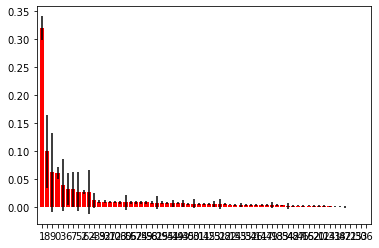

In [42]:
random_forest_fit = RandomForestClassifier(n_estimators=500, criterion="gini", max_depth=30, min_samples_split=2, min_samples_leaf=2)
random_forest_fit.fit(x_train, y_train)
importances = random_forest_fit.feature_importances_
standard_deviations = np.std([tree.feature_importances_ for tree in random_forest_fit.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
column_names = list(x_train.columns)

print("Feature ranking:")
for feature in range(x_train.shape[1]):
    print ("Feature", indices[feature], ",", column_names[indices[feature]], importances[indices[feature]])
    
plt.figure()
plt.bar(range(x_train.shape[1]), importances[indices], color="r", yerr=standard_deviations[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

As you can see, our top five variables for predictive power in our Random Forest model are:
1. duration
2. euribor3m
3. nr_employed
4. age
5. pdays

## Comparison of Models

Now we are at the point where we can compare our models. This will greatly help us with the selection of our model for the construction of our app. Let's get to it!

The component we would like to analyze for model comparison would be the testing accuracy of the models, which can be found in the corresponding confusion matrices. They are the following (rounded to second decimal place):

Logistic Regression Testing Accuracy: 0.90

Random Forest Testing Accuracy: 0.91

--

Let's include a plot as a visual to represent these results.

--

Based on these results, the Random Forest model has a higher testing accuracy than the Logistic Regression model.
We also do not need to worry about multi-collinearity with the Random Forest model.

It is for these reasons that we have decided to use our Random Forest model for our Supervised Classification Machine Learning solution!

--

## Performance Evaluation

Upon completion of this assignment, there are both elements that we have done well with as well as elements that we could have done better with.

*Elements that we have done well with include:

*Elements that we could have done better with:
- We could have eliminated duration as a variable because even though it has incredibly strong predictive power, eliminating it would have given us a much more realistic predictive model. This is because when duration is 0 then deposit is 'no'.
- 

## Results

## Deployment